# Video Game Sales: Analysis

## Importing Essential Libraries

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## Importing the Dataset

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#The 2016 raw data is not fully completed. Thus, we should remove it. 
df = df.drop(df[df['Year'] > 2015].index)

In [5]:
df.shape

(16250, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


As we can see, there are 11 columns in this dataset. Let's explain all of them: 

* Rank: The rank that the video game has obtained in terms in the number of sales that it has. 
* Name: The name of the video game.
* Platform: The platforms in which the video game was actually released (PS4, Xbox, Wii, PC, etc.) 
* Year: The year in which that the video game was released. 
* Genre: The genre class that the video game belongs to. 
* Publisher: The company that had published the video game. 
* NA_Sales: The sales figure of the video game in the North American region. The number is in the millions and is a floating point number. 
* EU_Sales: The sales figure of the video game in Europe region. The number is in the millions and is a floating point number. 
* JP_Sales: The sales figure of the video game in Japan. The number is in the millions and is a floating point number. 
* Global_Sales: The sales figure of the video in the entirety of the world. The number is in the millions and is a floating point number. 


### How many games of each genre are available in this dataset?

In [7]:
df['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

As we can see, many of the games listed on the dataset are considered action video games. Let's explore this a bit more by plotting it. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

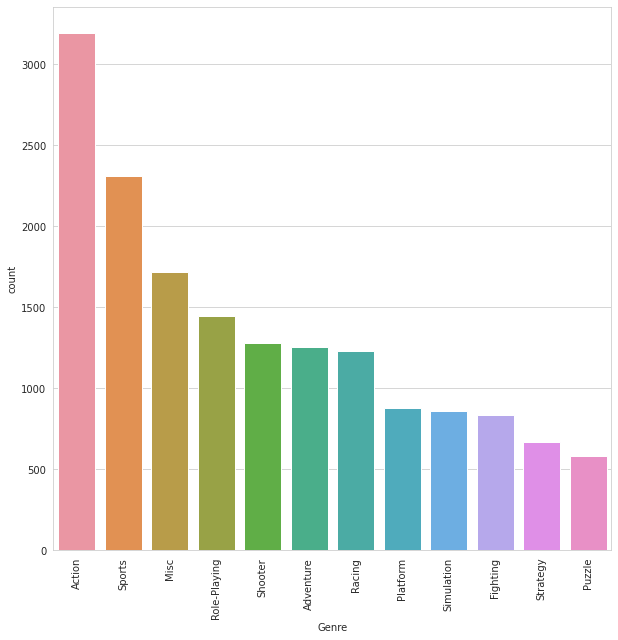

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x="Genre", data = df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

### Which year had the most video game releases?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

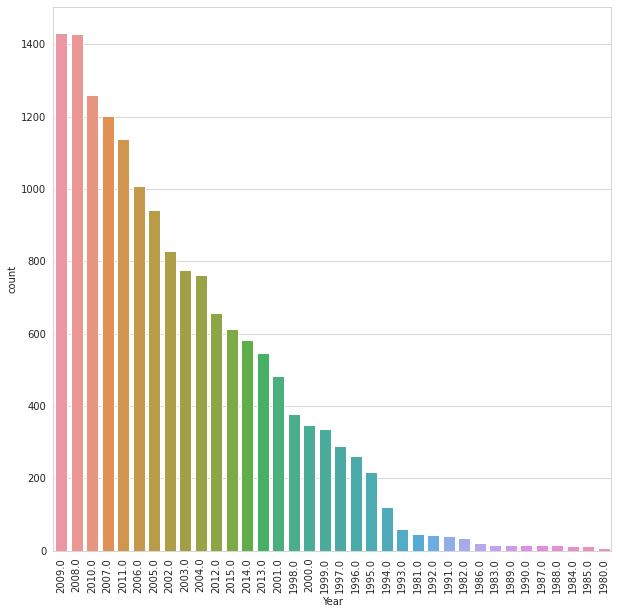

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x='Year', data = df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation = 90)

2009 was the largest year for video game releases with over 1400 video games being released. 

### What were the most released genres between 2007 and 2011? 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

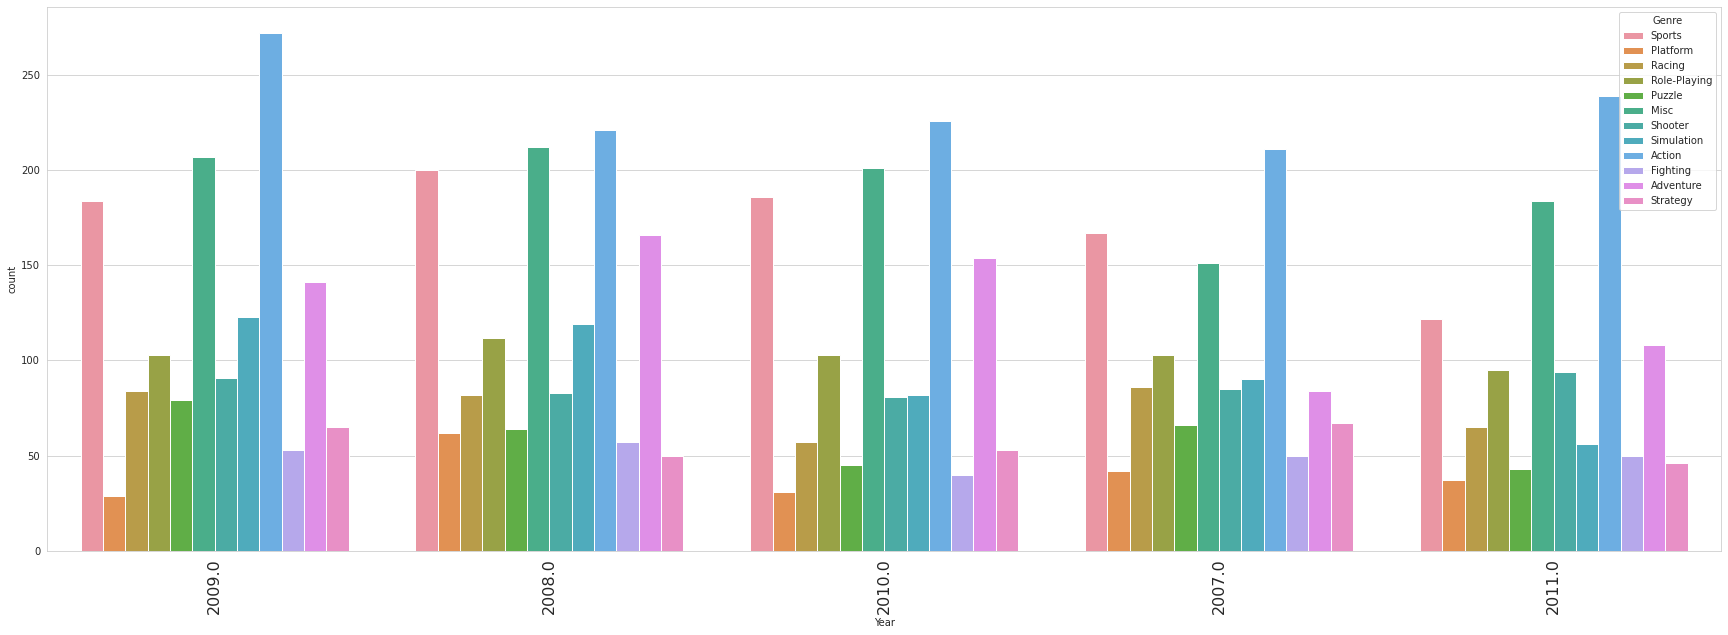

In [10]:
plt.figure(figsize=(30,10))
sns.countplot(x="Year", data=df, hue = 'Genre', order = df.Year.value_counts().iloc[:5].index)
plt.xticks(size = 16, rotation = 90)

As we can see, for every single year displayed on the graph (2007-2011), action games were the most released game genres. 

### Which year had the highest sales worldwide?

In [11]:
years = df.groupby(by=['Year'])['Global_Sales'].sum()
years = years.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

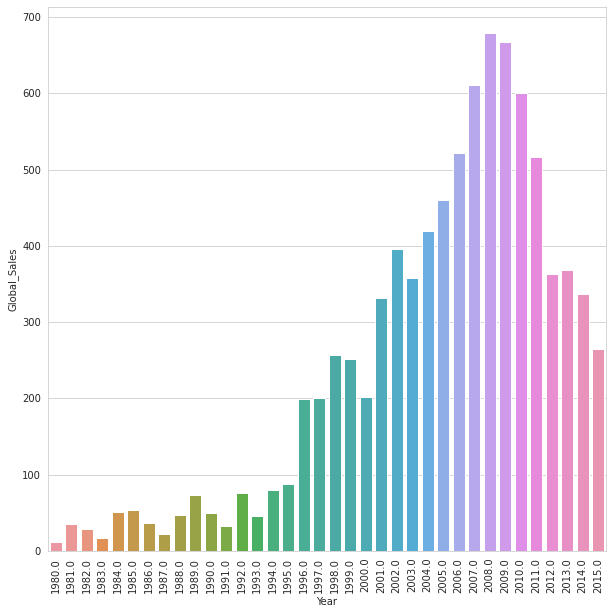

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x='Year', y='Global_Sales', data=years)
plt.xticks(rotation=90)

As we can see from the data, 2008 had the most video games sales. This is expected considering that consoles like the PS3 and Xbox 360 just began to pick up its users. 

### Which genre of games was released the most in a single year?

In [14]:
year_genre_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_genre_idx = year_genre_df.groupby(['Year'])['count'].transform(max) == year_genre_df['count']
year_max_genre = year_genre_df[year_genre_idx].reset_index(drop = True)
year_max_genre = year_max_genre.drop_duplicates(subset = ['Year', 'count'], keep = 'last').reset_index(drop = True)

In [15]:
genre = year_max_genre['Genre'].values

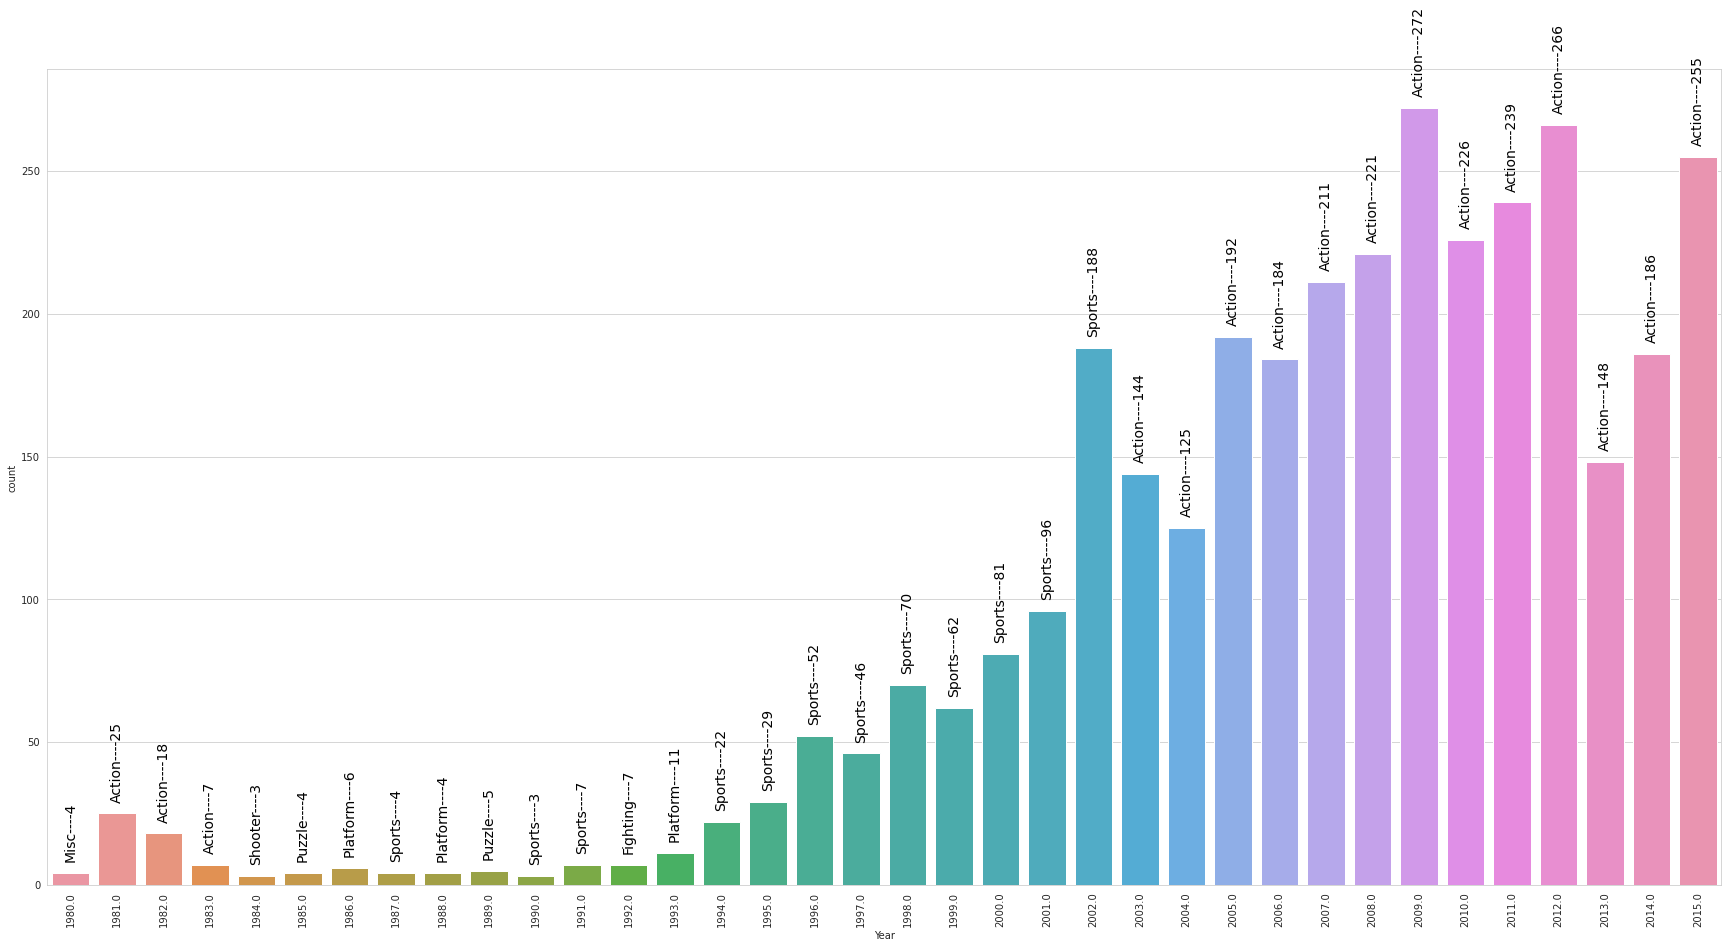

In [16]:
plt.figure(figsize=(30,15))
graph = sns.barplot(x = 'Year', y = 'count', data = year_max_genre)
index = 0

for value in year_max_genre['count'].values:
    graph.text(index, value + 5, str(genre[index] + '----' + str(value)), color = '#000', size = 14, rotation = 90, ha='center')
    index += 1
    

plt.xticks(rotation = 90)
plt.show()

From this graph, we can see that after 2003, the genre of games that were most released was action games. Prior to 2003, sports was the most released genre of video games for several years. 

### Which video game genre sold the most video games in a single year?

In [17]:
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [18]:
genre = year_sale_max['Genre']

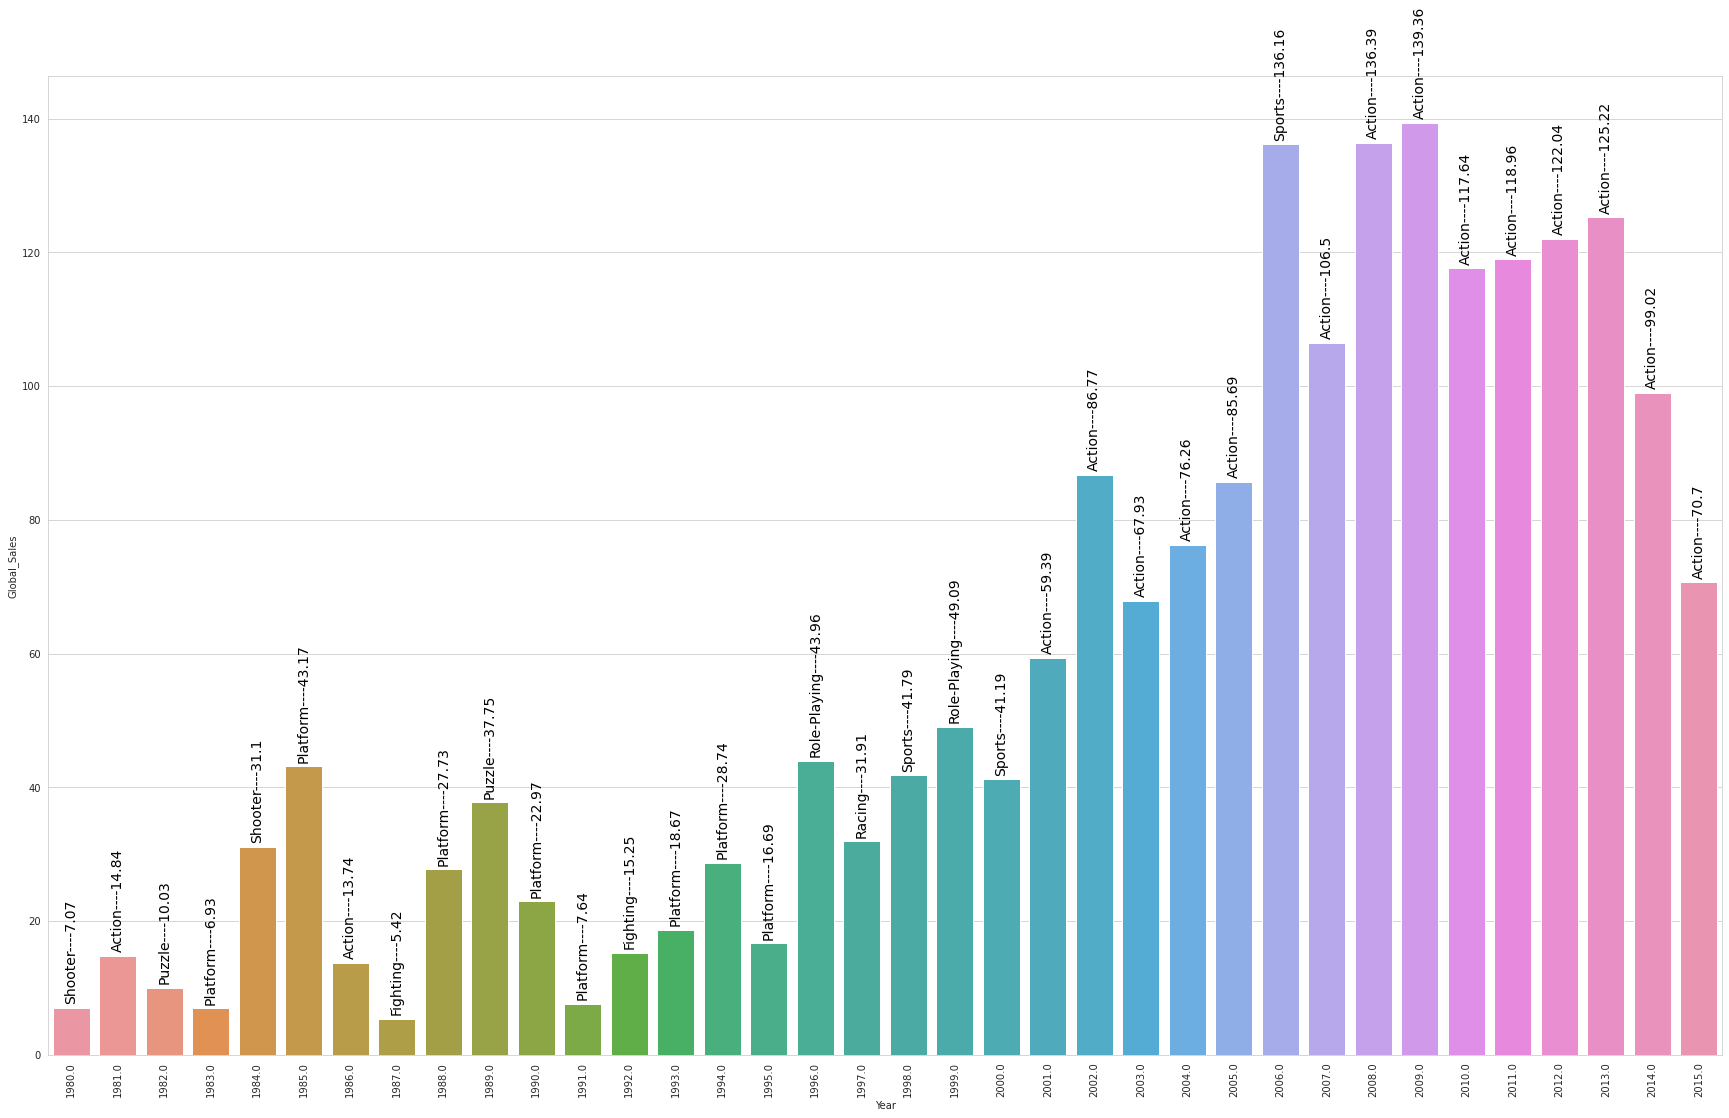

In [19]:
plt.figure(figsize=(30, 18))
graph = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    graph.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

From this graph, we can see that despite actions games being the most released video game genre in 2006, video games related to sports actually sold the most in 2006 with over 136 million copies worldwide. 

###  Which platform has the highest video game sales globally?

In [20]:
data_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

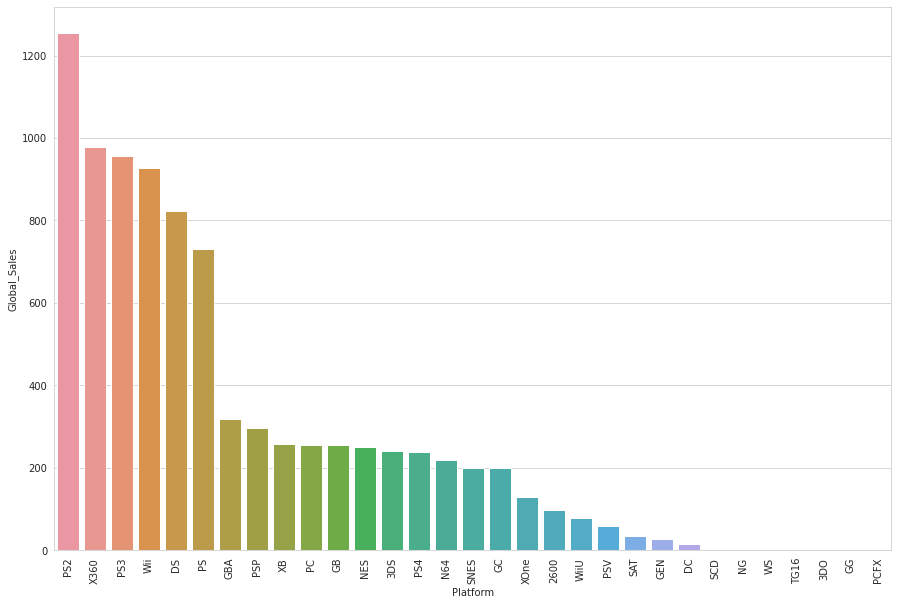

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

As we can see from this data, most video games that were sold were sold for the PlayStation 2.

### Which video game publisher published the most games?

In [23]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

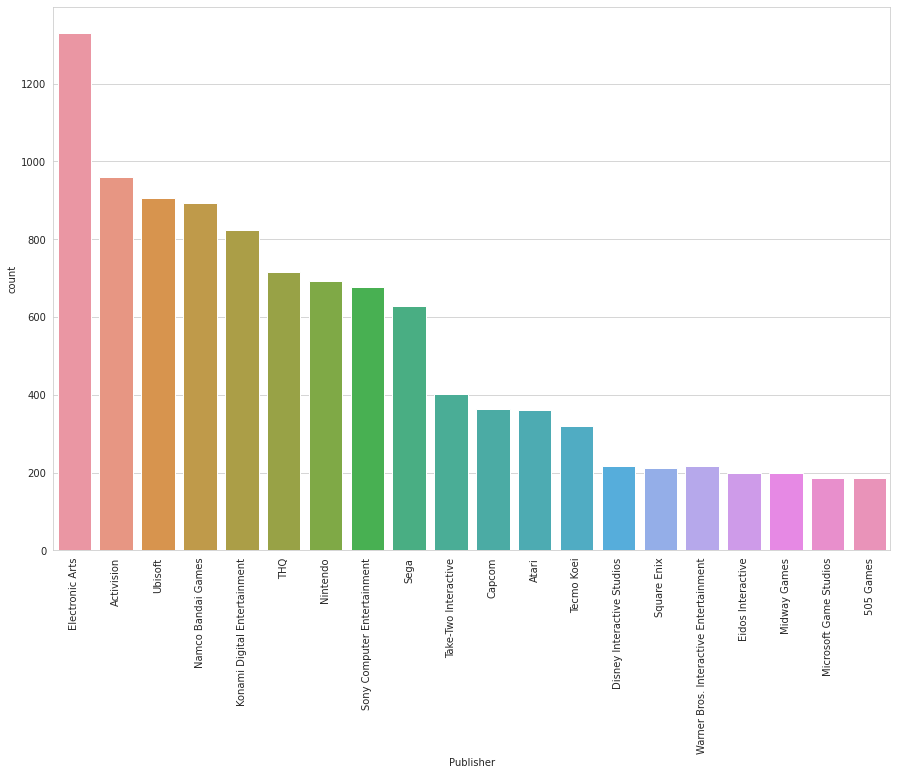

In [24]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

As we can see from this graph, Electronic Arts (EA) published the most video games according to this dataset. 

### What publisher made the most global sales?

In [25]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

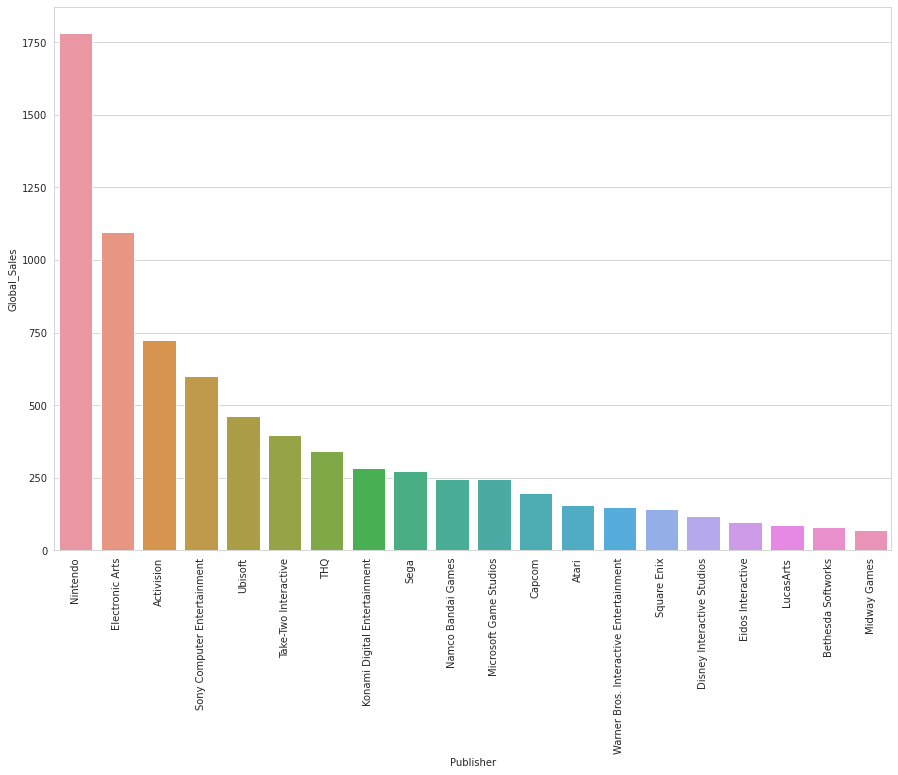

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

From this graph, we can see that Nintendo actually had made the most money from their video games despite publishing less than 800 games at the time of this dataset being recorded. 

### What was the total video game revenue based on the regions in the dataset?

In [27]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


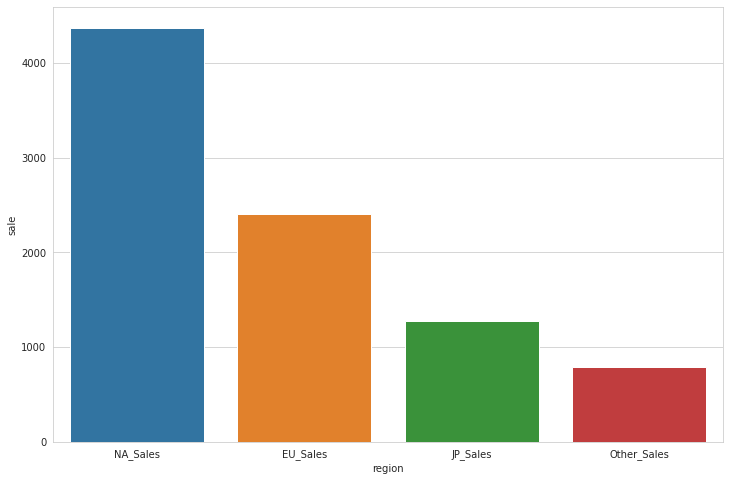

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

As we can see, Nortth America had made the most revenue globablly from video game sales. Let's explore this with a pie chart. 

In [29]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7f088a6c13d0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

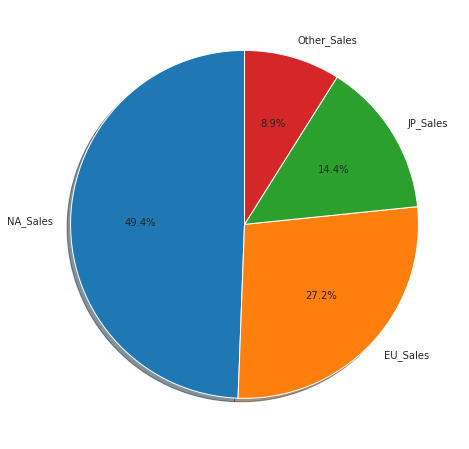

In [30]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

As we can see, North America covers almost 50% of total global revenue from video games. 

### Pairplot for Genre

In [31]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


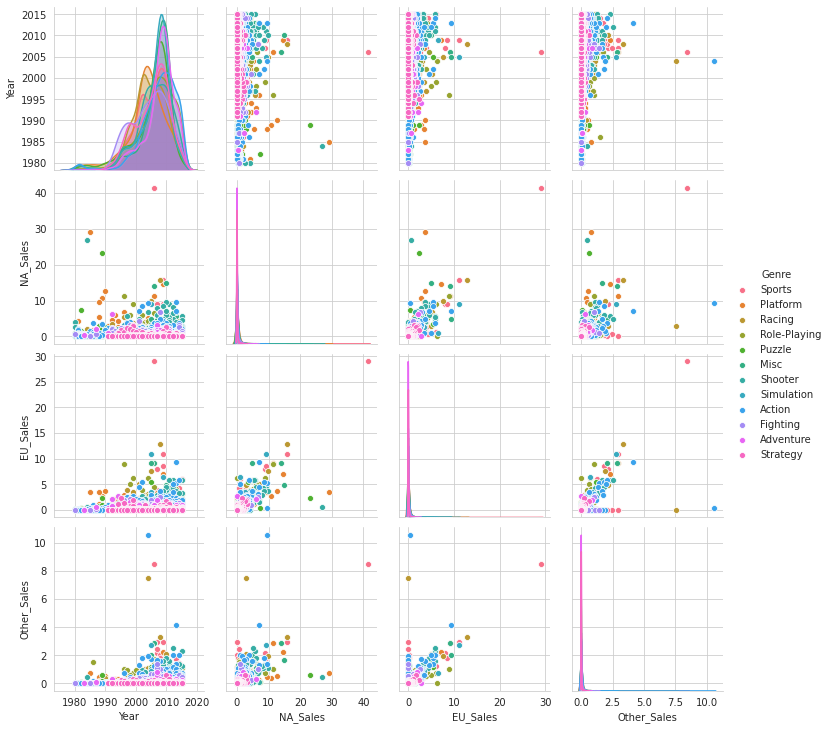

In [32]:
sns.pairplot(data_pair, hue='Genre')

From this dataset, we were able to notice a couple of things: 

* Action video games are the most released and sold genre of video games in the recent years. 
* The PlayStation 2 was the platform that most people bought their video games for. 
* Electronic Arts published the most video games. 
* Nintendo had the most video game sales globally. 
* North American accounts for about 50% of all video game sales globally. 
